In [8]:
#2021.06.22 TUE
#Hankyeong

##CH08-2. 다중선형회귀(Multivariable Linenar Regression)
#00-1. 패키지 호출
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline 

#01. 보스턴 집값 예측하기. 
#(1) 데이터셋 불러오기. 
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


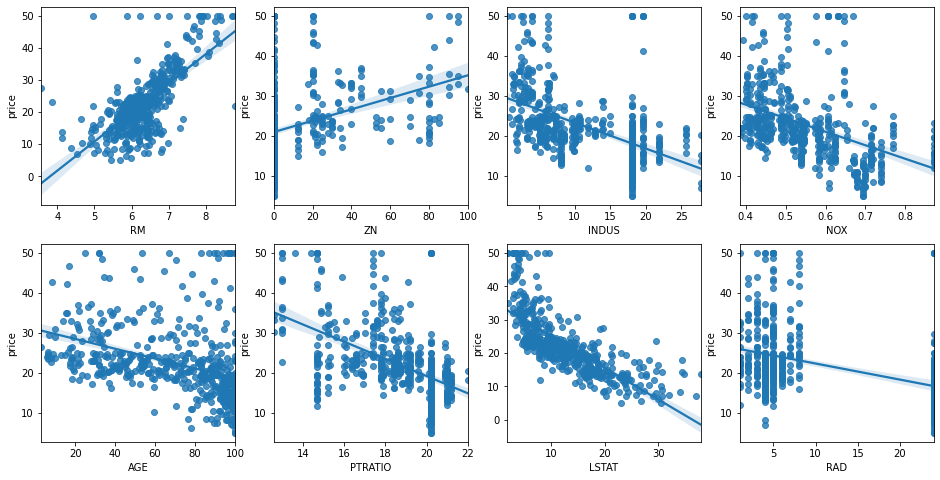

In [7]:
#(2) 산점도와 선형회귀 직선 그리기. 
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(features) :
    row = i//4
    col = i%4
    sns.regplot(x=feature,y='price',data=df_boston, ax=axs[row][col])

In [16]:
#(3) 단순선형회귀를 통해 변수별 R^2 구하기. 
for feature in boston.feature_names :
    x = df_boston[feature].values.reshape(-1,1)
    y = boston.target
    lr = LinearRegression()
    lr.fit(x,y)
    r2 = lr.score(x,y)
    print(f'{feature} = {r2:.4f}')

CRIM = 0.1508
ZN = 0.1299
INDUS = 0.2340
CHAS = 0.0307
NOX = 0.1826
RM = 0.4835
AGE = 0.1421
DIS = 0.0625
RAD = 0.1456
TAX = 0.2195
PTRATIO = 0.2578
B = 0.1112
LSTAT = 0.5441


In [15]:
#MEMO. RM과 LSTAT이 R^2이 높음. 

In [17]:
#(5) 다중선형회귀 모델 정의하기. 
X  = boston.data 
y  = boston.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [19]:
#(6) weight(가중치 혹은 회귀계수), bias(절편) 값 구하기. 
weights = lr.coef_
bias    = lr.intercept_
weights, bias

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.459488385089855)

In [23]:
#(7) R^2 값 구하기. 
R2 = lr.score(X,y)
R2

0.7406426641094095